In [36]:
import pandas as pd

In [37]:
import numpy as np

In [38]:
import math

In [39]:
import operator

In [40]:
data=pd.read_csv("iris.csv")

In [41]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
import matplotlib.pyplot as plt

In [45]:
setosa=data[data['Name']=='Iris-setosa']
versicolor =data[data['Name']=='Iris-versicolor']
virginica =data[data['Name']=='Iris-virginica']


In [46]:
print(setosa.describe())
print(versicolor.describe())
print(virginica.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count     50.00000   50.000000    50.000000    50.00000
mean       5.00600    3.418000     1.464000     0.24400
std        0.35249    0.381024     0.173511     0.10721
min        4.30000    2.300000     1.000000     0.10000
25%        4.80000    3.125000     1.400000     0.20000
50%        5.00000    3.400000     1.500000     0.20000
75%        5.20000    3.675000     1.575000     0.30000
max        5.80000    4.400000     1.900000     0.60000
       SepalLength  SepalWidth  PetalLength  PetalWidth
count    50.000000   50.000000    50.000000   50.000000
mean      5.936000    2.770000     4.260000    1.326000
std       0.516171    0.313798     0.469911    0.197753
min       4.900000    2.000000     3.000000    1.000000
25%       5.600000    2.525000     4.000000    1.200000
50%       5.900000    2.800000     4.350000    1.300000
75%       6.300000    3.000000     4.600000    1.500000
max       7.000000    3.400000     5.100000    1

<Figure size 432x288 with 0 Axes>

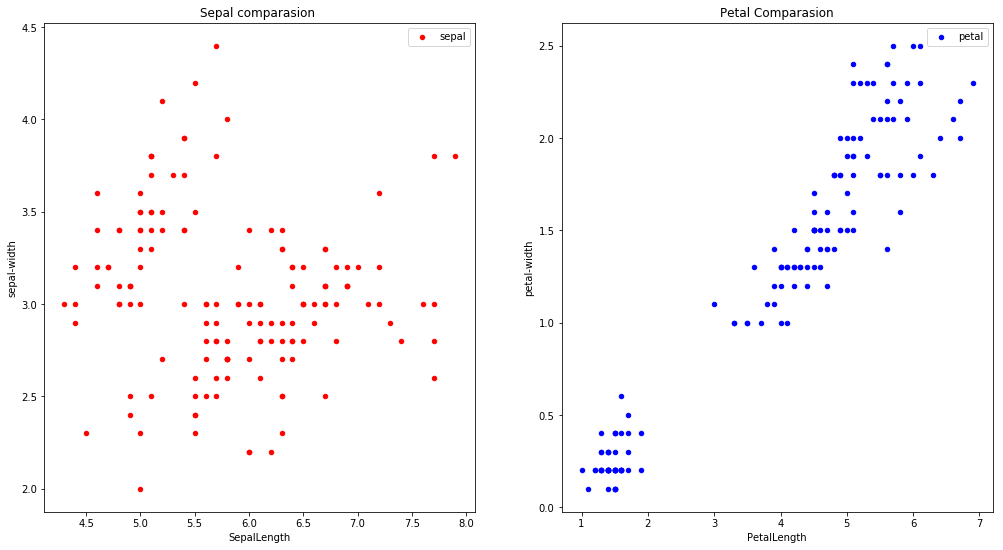

In [48]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
data.plot(x="SepalLength",y="SepalWidth",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
data.plot(x="PetalLength",y="PetalWidth",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

<Figure size 432x288 with 0 Axes>

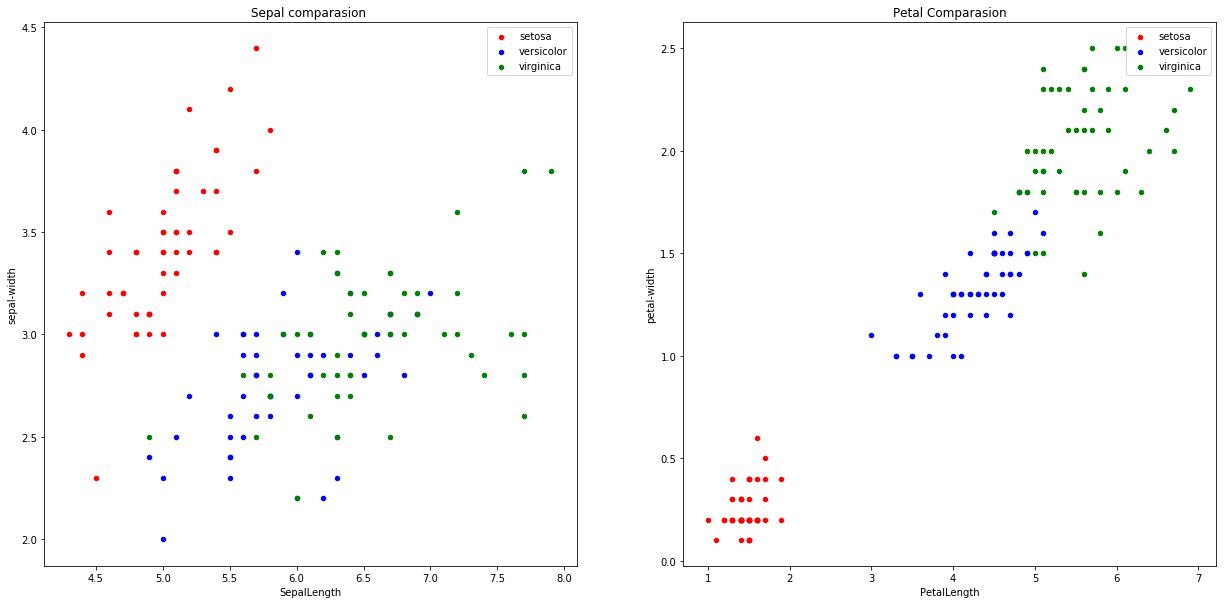

In [49]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="SepalLength", y="SepalWidth", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="SepalLength",y="SepalWidth",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="SepalLength", y="SepalWidth", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="PetalLength", y="PetalWidth", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="PetalLength",y="PetalWidth",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="PetalLength", y="PetalWidth", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

In [24]:
def euclideanDistance(data1,data2,length):
    distance=0
    for x in range(length):
        print(data1[x],data2[x])
        distance+=np.square(data1[x]-data2[x])
    return np.sqrt(distance)

In [25]:
def knn(train_data,test_data,k):
    distance={}
    sort={}
    length=test_data.shape[1]
    print(length)
    for x in range(len(train_data)):
        dist=euclideanDistance(test_data,train_data.iloc[x],length)
        print(dist)
        distance[x]=dist[0]
    sorted_data=sorted(distance.items(),key=operator.itemgetter(1))
    neighbours=[]
    for x in range(k):
        neighbours.append(sorted_data[x][0])
    classVotes={}
    for x in range(len(neighbours)):
        response=train_data.iloc[neighbours[x]][-1]
        if response in classVotes:
            classVotes[response]+=1
        else:
            classVotes[response]=1
    sortedVotes=sorted(classVotes.items(),key=operator.itemgetter(1),reverse=True)
    return (sortedVotes[0][0],neighbours)
    

In [26]:
testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)
k=1
result,neigh = knn(data, test, k)
print(result)

4
0    7.2
Name: 0, dtype: float64 5.1
0    3.6
Name: 1, dtype: float64 3.5
0    5.1
Name: 2, dtype: float64 1.4
0    2.5
Name: 3, dtype: float64 0.2
0    4.837355
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 4.9
0    3.6
Name: 1, dtype: float64 3.0
0    5.1
Name: 2, dtype: float64 1.4
0    2.5
Name: 3, dtype: float64 0.2
0    4.962862
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 4.7
0    3.6
Name: 1, dtype: float64 3.2
0    5.1
Name: 2, dtype: float64 1.3
0    2.5
Name: 3, dtype: float64 0.2
0    5.112729
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 4.6
0    3.6
Name: 1, dtype: float64 3.1
0    5.1
Name: 2, dtype: float64 1.5
0    2.5
Name: 3, dtype: float64 0.2
0    5.025933
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 5.0
0    3.6
Name: 1, dtype: float64 3.6
0    5.1
Name: 2, dtype: float64 1.4
0    2.5
Name: 3, dtype: float64 0.2
0    4.880574
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 5.4
0    3.6
Name: 1, dtype: float6

0    1.964688
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 6.0
0    3.6
Name: 1, dtype: float64 2.2
0    5.1
Name: 2, dtype: float64 4.0
0    2.5
Name: 3, dtype: float64 1.0
0    2.61916
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 6.1
0    3.6
Name: 1, dtype: float64 2.9
0    5.1
Name: 2, dtype: float64 4.7
0    2.5
Name: 3, dtype: float64 1.4
0    1.752142
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 5.6
0    3.6
Name: 1, dtype: float64 2.9
0    5.1
Name: 2, dtype: float64 3.6
0    2.5
Name: 3, dtype: float64 1.3
0    2.596151
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 6.7
0    3.6
Name: 1, dtype: float64 3.1
0    5.1
Name: 2, dtype: float64 4.4
0    2.5
Name: 3, dtype: float64 1.4
0    1.48324
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 5.6
0    3.6
Name: 1, dtype: float64 3.0
0    5.1
Name: 2, dtype: float64 4.5
0    2.5
Name: 3, dtype: float64 1.5
0    2.068816
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 5

Name: 2, dtype: float64 5.6
0    2.5
Name: 3, dtype: float64 2.2
0    1.272792
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 6.3
0    3.6
Name: 1, dtype: float64 2.8
0    5.1
Name: 2, dtype: float64 5.1
0    2.5
Name: 3, dtype: float64 1.5
0    1.565248
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 6.1
0    3.6
Name: 1, dtype: float64 2.6
0    5.1
Name: 2, dtype: float64 5.6
0    2.5
Name: 3, dtype: float64 1.4
0    1.915724
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 7.7
0    3.6
Name: 1, dtype: float64 3.0
0    5.1
Name: 2, dtype: float64 6.1
0    2.5
Name: 3, dtype: float64 2.3
0    1.284523
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 6.3
0    3.6
Name: 1, dtype: float64 3.4
0    5.1
Name: 2, dtype: float64 5.6
0    2.5
Name: 3, dtype: float64 2.4
0    1.053565
Name: 0, dtype: float64
0    7.2
Name: 0, dtype: float64 6.4
0    3.6
Name: 1, dtype: float64 3.1
0    5.1
Name: 2, dtype: float64 5.5
0    2.5
Name: 3, dtype: float64 1.8
0    

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_jobs=3)
knn.fit(data.iloc[:,0:4],data['Name'])
print (knn.predict(test))

['Iris-virginica']


In [2]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [ ]:
self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [ ]:
Kmeans(self, technique='random', n_clusters=2, output = 'all'): 
        km = KMeans(init=technique, n_clusters=n_clusters)    
        km.fit(self.X_train)